## Math 157: Intro to Mathematical Software

## UC San Diego, winter 2023

# Final Lecture



## Goal of this lecture
basics of unsupervised learning -> introduce k-means algorithm

## Run this first

In [1]:
using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("Plots")
#Pkg.add("StatsBase")
#Pkg.add("RDatasets")
#Pkg.add("Clustering")
#Pkg.add("Statistics")
#Pkg.add("Distances")
#Pkg.add("MLDatasets")

using CSV
using DataFrames
using Plots
using StatsBase
using RDatasets
using Clustering
using Statistics
using Distances
using MLDatasets
include("methods.jl")

silhouetteScore (generic function with 1 method)

## Intro to K-means
K-means is a unsupervised learning algorithm that aims to cluser data within k clusters. This means the algorithm is usaully deployed on datasets that don't have a label variable so it aims to look for patterns within the data and highlight that by making k distinct clusters.<br>
A basic idea can be observed through the graphs below.


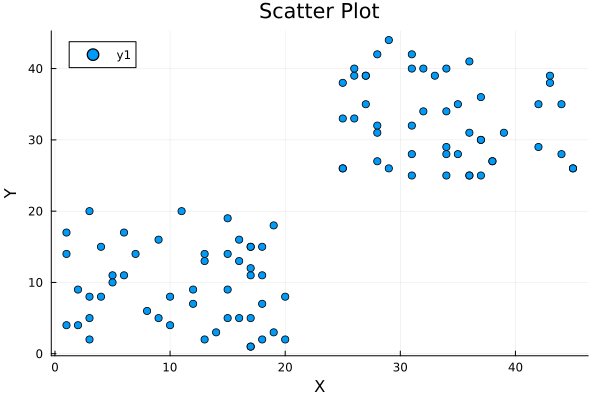

In [2]:
x1 = rand(1:20, 50)
y1 = rand(1:20, 50)
group1 = fill(1, 50)
x2 = rand(25:45, 50)
y2 = rand(25:45, 50)
group2 = fill(2, 50)

X = vcat(x1, x2)
Y = vcat(y1, y2)
Group = vcat(group1, group2)
scatter(X, Y, title="Scatter Plot", xlabel="X", ylabel="Y")

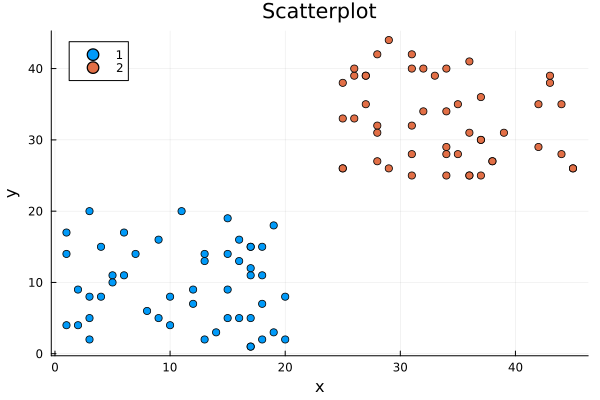

In [3]:
df = DataFrame(X=X, Y=Y)
df = kMeansAlgo(df, 2, "X", "Y")
scatter(X, Y, group=Group, xlabel="x", ylabel="y", title="Scatterplot")

## Steps to k-means
1. Pick k random points to serve as cluster centroids
2. Assign the rest of the data points to the closest cluster centroid(measure distance from cluster through euclidean distance)<br>
Euc(x, y) = $$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}$$<br>
3. Compute the mean of all the data points belonging to each unique cluster and reassign that as the new cetroid<br>
newCentroid = $$\frac{1}{n} (\sum_{i=1}^{n} x_i, \sum_{i=1}^{n} y_i)$$
4. Continue steps 2 and 3 until we hit the max number of iterations or our model converges

## Lets take a deeper look at our implmentation

In [4]:
#This is the overall function call for our kmeans implmentation
function kMeansAlgo(data, k, xVar, yVar)
    runsList = []
    newData = 0
    min = Inf
    #runs algorithm 10 times and grabs the clusters with the minimized WCSS value
    for runs in collect(1:10)
        #Handles the first iteration of our method -> randomly selects clusters
        group = firstIteration(data, k, xVar, yVar)
        groupValues = collect(values(sort(group)))
        #runs the rest of the itertations untill we hit the max or model converges
        newData = otherIterations(data, xVar, yVar, groupValues)
        sum = WCSS(newData, xVar, yVar)
        if sum < min
            min = sum
            runsList = copy(newData.Group)
        end
    end
    #returns the cluster assignments with the minimized wcss
    newData.Group = runsList
    return newData
end

kMeansAlgo (generic function with 1 method)

## How do we call our function?

In [5]:
#load dataset
iris = dataset("datasets", "iris")
iris_df = DataFrame(iris)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


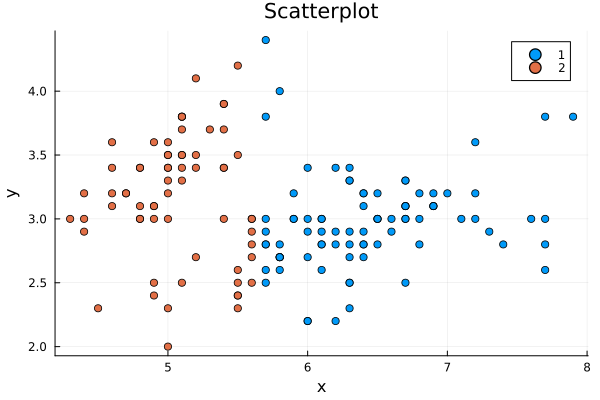

In [6]:
#call the kmeans algorithm 
k = rand(2:5)
irisData = kMeansAlgo(iris_df, k, "SepalLength", "SepalWidth")

scatter(irisData.SepalLength, irisData.SepalWidth, group=irisData.Group, xlabel="x", ylabel="y", title="Scatterplot")

### Participation Check
call kmeans(k=2) and create a scatter a plot using group for the original dataset we introduced

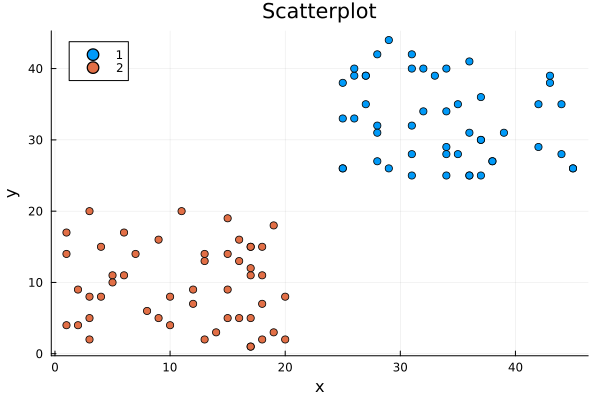

In [7]:
df = kMeansAlgo(df, 2, "X", "Y")
scatter(df.X, df.Y, group=df.Group, xlabel="x", ylabel="y", title="Scatterplot")

## How do we choose the right k value

Let's assume we wanted to use the sepal length and width to try and cluster the data within this iris dataframe. Assuming we don't have any labels for the data how would we know the apropiate number of clusters that would best fit this dataset

## WCSS and elbow plots
WCSS stands for Within-Cluster Sum of Squares and measures the sum of differences between data points and their assigned cluster centroid. If we are curious about which K we should use we can try out a variety of values for k while calculating their WCSS and then plot the two against each other.<br>
<br>
This creates what's known as a elbow plot and the optimal k can usually be found where the graph bends. It's important to remever that this is just one estimate for the best K, so always try to use a blend of metrics.<br><br>
Formula for WCSS:<br>

$$\mathrm{WCSS}(C) = \sum_{i=1}^{n} \sum_{x \in C_i} \left\Vert x - m_i \right\Vert^2$$<br>
Here we assume that<br>
$C$ = the clusters<br>
$n$ = the number of points in a cluster<br>
$m_i$ = the average of the data points for this cluster

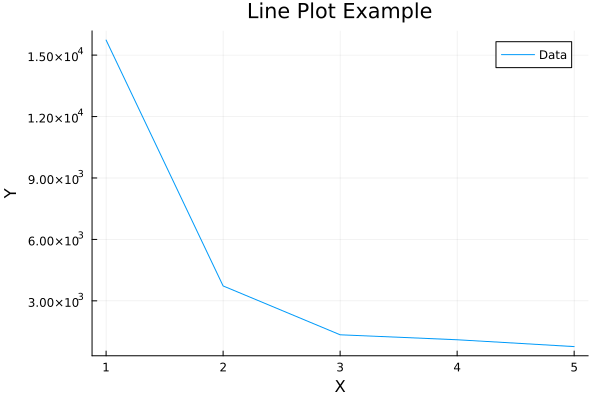

In [8]:
kWCSSList = []
for k in collect(1:5)
    group = kMeansAlgo(iris_df, k, "SepalLength", "SepalWidth")
    kWCSS = WCSS(iris_df, "SepalLength", "SepalWidth")
    push!(kWCSSList, kWCSS)
end
plot(collect(1:5), kWCSSList, label="Data", title="Elbow Plot Example", xlabel="X", ylabel="Y")

## Silhouette score
This is another metric that can be used to measure how well our chosen k is. Here are the main steps:<br>
1. For each data point in a cluster calculate the average distance between the point and all other points in the cluster(intra-cluster diff)
2. For each data point, find the nearest cluster that does not contain it and calculate the distance between our data point and all the objects in this nearby cluster(near-cluster diff)
3. Calculate (near-cluster diff - intra-cluster diff)/max(near-cluster diff, intra-cluster diff)<br>
$a(i) = \frac{1}{n_i-1}\sum_{j \in C_i, i \neq j} Euc(x_i, x_j)$<br>
$b(i) = \min_{j \neq i} \frac{1}{n_j} \sum_{x \in C_j} Euc(x_i, x)$<br>
$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$<br>
4. take the average of all these data point Silhouette scores and that will represent the overall model
$$S = \frac{1}{n} \sum_{i=1}^{n} s(i)$$

In [9]:
sScoreList = []
for k in collect(2:5)
    group = kMeansAlgo(iris_df, k, "SepalLength", "SepalWidth")
    s = silhouetteScore(iris_df, "SepalLength", "SepalWidth")
    push!(sScoreList, s)
end
println(sScoreList)

Any[0.47638637838647196, 0.4052324863104558, 0.381861174968476, 0.2694683752897771]


These are just two metrics that can help us not only determine the optimal k for our dataset, but can also help us evaluate how efficient our algorithm is overall. It's important to use a variety of methods when working with datasets as each has its own pros and cons.